In [186]:
enterprise = '中国联合网络通信集团有限公司'
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
data1 = pd.read_csv("D:/pytest/liushui/1liushui.csv", encoding="gbk")
data1_lt = data1[data1['企业名称系统存储'] == enterprise]
for i in range(2,12):
    data2 = pd.read_csv("D:/pytest/liushui/%dliushui.csv"%i, encoding="gbk")
    data2_lt = data2[data2['企业名称系统存储'] == enterprise]
    data = pd.concat([data1_lt, data2_lt])
    data1_lt = data 
print(datetime.time)

c:\users\zhangchi23\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


<method 'time' of 'datetime.datetime' objects>


In [188]:
data1_lt_copy = data1_lt.copy()
data1_lt_copy =data1_lt_copy[data1_lt_copy.一级分类.isin(['电脑、办公', '数码', '家用电器'])]

In [189]:
data1_lt_copy['date'] = pd.to_datetime(data1_lt_copy['订单时间'],infer_datetime_format=True)  
data1_lt_pivot = pd.pivot_table(data1_lt_copy, index=['date'], columns=['一级分类'], values=['金额'], aggfunc = np.sum)
data1_lt_pivot = data1_lt_pivot.reset_index()
data1_lt_pivot = data1_lt_pivot.fillna(0)
data1_lt_pivot_copy = data1_lt_pivot.copy()
data1_lt_pivot_copy['date'] = [datetime.strftime(x, '%Y/%m/%d') for x in data1_lt_pivot_copy['date']]
data1_lt_pivot_copy_2 =data1_lt_pivot_copy.loc[:,['金额', 'date']]
data1_lt_pivot_copy_2 = data1_lt_pivot_copy_2.set_index('date')
data1_lt_pivot_copy_2 = data1_lt_pivot_copy_2.sort_index()
data1_lt_pivot_copy_2 = data1_lt_pivot_copy_2.reset_index()
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.plot(data_lt11['date'], data_lt1['金额'])
# plt.xticks(data_lt11.date[[0,25,50,75,100,125,150,175,200,225,250,275,300]], rotation='45', ha='right')
# plt.show()

In [191]:
data1_lt_pivot_copy_2.columns = ['date', '家用电器', '数码', '电脑、办公']
data1_lt_pivot.columns = ['date', '家用电器', '数码', '电脑、办公']

In [193]:
type(data1_lt_pivot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [194]:
appliance = []
# phone = []
digital = []
pc_official = []
mon = []
year = []
for item in data1_lt_pivot.index:
    if data1_lt_pivot['date'][item].year == 2017:
        for month in range(1,13):
            if data1_lt_pivot['date'][item].month == month:
                mon.append(month)
                appliance.append(data1_lt_pivot['家用电器'][item])
#                 phone.append(data1_lt_pivot[ '手机'][item])
                digital.append(data1_lt_pivot[ '数码'][item])
                pc_official.append(data1_lt_pivot['电脑、办公'][item])
                year.append(2017)
                
    if data1_lt_pivot['date'][item].year == 2018:
        for month in range(1,13):
            if data1_lt_pivot['date'][item].month == month:
                mon.append(month)
                appliance.append(data1_lt_pivot['家用电器'][item])
#                 phone.append(data1_lt_pivot[ '手机'][item])
                digital.append(data1_lt_pivot[ '数码'][item])
                pc_official.append(data1_lt_pivot['电脑、办公'][item])
                year.append(2018)
                
data_pivot_day = pd.DataFrame(list(zip(mon, appliance, digital, pc_official, year)))
data_pivot_day.columns = ['月份', '家用电器', '数码', '电脑、办公', '年份']

In [195]:
#生成按天计算的透视表的日期列
data_pivot_day['date'] =1
#将年月合并到一列
for i in range(0,len(data_pivot_day)):
    data_pivot_day['date'][i] = '%s'%data_pivot_day['年份'][i] + '/' + '%s'%data_pivot_day['月份'][i]
    
data_pivot_month = pd.pivot_table(data_pivot_day, index=['date'] ,values=['家用电器',  '数码', '电脑、办公'], aggfunc = np.sum)
data_pivot_month = data_pivot_month.reset_index()
data_pivot_month['date'] = [datetime.strptime(x, '%Y/%m') for x in data_pivot_month['date']]
data_pivot_month.sort_values("date")
data_pivot_month_copy = data_pivot_month.copy()
data_pivot_month_copy  = data_pivot_month_copy.set_index('date')
data_pivot_month_copy  = data_pivot_month_copy.sort_index()

c:\users\zhangchi23\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


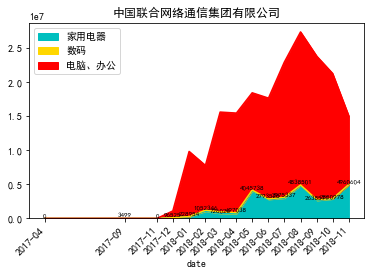

In [205]:
import matplotlib as mpl
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
data_pivot_month_copy.plot.area( y = [ '家用电器', '数码', '电脑、办公'], color = ['c', 'gold', 'r'])
plt.xticks(data_pivot_month_copy.index, rotation='45', ha='right')
x = data_pivot_month_copy.index
y = data_pivot_month_copy[ '家用电器']
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)
plt.title(enterprise)
plt.show()